In [150]:
using DataFrames
using DataFramesMeta
using CSV
using SavitzkyGolay
using Plots
using CurveFit

In [151]:
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\WDM\\RAV16\\Plates\\LONG-PM-NS-R1_R16_230302151337_S2_LP.dat", DataFrame)
df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\WDM\\RAV16\\Plates\\LONG-PM-NS-R1_R16_230302151337_S5_LP.dat", DataFrame)
#df = CSV.read("\\Users\\royj\\development\\LONG-PM-NS-R1_R09_230302094024_S1_TEX.dat",DataFrame)
#df = CSV.read("\\\\trllimited\\data\\INF_TRACS\\TRACS5\\1 - Accreditation\\RAV17\\5-Accreditation-May23\\CC Output\\TRACS4\\Plates\\Texture\\RAV17_NS_Run_1_A.dat", DataFrame)
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\PTS\\MFV1 resubmission\\ProfileMats\\LONG-PM-NS-R2_rcd_AB1_tex.dat", DataFrame)
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\PTS\\MFV2 sumbission2\\ProfileMats\\LONG-PM-NS-R1_AB1_tex.dat", DataFrame)
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\PTS\\MFV2 sumbission2\\ProfileMats\\LONG-PM-NS-R1_AB1_tex.dat", DataFrame)
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\G-L\\Tempest4\\PM_Long\\NS\\T4_20230524_094145_GLUK_RCD_L1AB_tex.dat", DataFrame)
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\G-L\\Tempest3\\PM_Long\\NS\\T3_20230524_094200_GLUK_RCD_tex.dat", DataFrame)

┌ Warning: thread = 1 warning: parsed expected 3 columns, but didn't reach end of line around data row: 1. Parsing extra columns and widening final columnset
└ @ CSV C:\Users\rjaques\.julia\packages\CSV\tmZyn\src\file.jl:587


Row,Chainage,NS LP,OS LP,Column4
,Float64,Float64,Float64,Missing
1,0.022,-37.3,107.0,missing
2,0.122,-37.9,108.0,missing
3,0.222,-36.3,109.0,missing
4,0.322,-35.0,109.4,missing
5,0.422,-33.9,109.5,missing
6,0.522,-32.9,110.1,missing
7,0.622,-32.5,111.2,missing
8,0.722,-32.6,112.1,missing
9,0.822,-32.5,112.3,missing


In [152]:
select!(df, 1:3)
rename!(df, [:Chainage, :NS, :OS])

# minimum_texture = minimum(df.Texture)

# adjustment_value = abs(minimum_texture)

# #df.adjusted_Tex = df.Texture + adjustment_value
# #df.adjusted_Tex = df.apply(lambda row: row.Texture + adjustment_value, axis=1)

# readings_per_metre = length(df.Chainage) / maximum(df.Chainage)
# println("readings per metre ", readings_per_metre)
# hertz = readings_per_metre/2
# println("hertz ", hertz)

Row,Chainage,NS,OS
,Float64,Float64,Float64
1,0.022,-37.3,107.0
2,0.122,-37.9,108.0
3,0.222,-36.3,109.0
4,0.322,-35.0,109.4
5,0.422,-33.9,109.5
6,0.522,-32.9,110.1
7,0.622,-32.5,111.2
8,0.722,-32.6,112.1
9,0.822,-32.5,112.3


In [153]:
# using Plots

# #plotattr(size=(1200,400))
# plot(df.Chainage
#     , df.Texture
    # , size=(1600,400))

In [154]:
# using DSP, Plots
# t = 1:1000; fs =2000; f0 = 60  # sampling and cutoff frequencies
# rawdata = df.Texture
# data_filt = filtfilt(digitalfilter(Lowpass(f0, fs=fs), Butterworth(1)), rawdata)
# plot(rawdata,label="input")
# plot!(data_filt, lc=:red, lw=2,label="filtered using filtfilt", size=(1600,400))

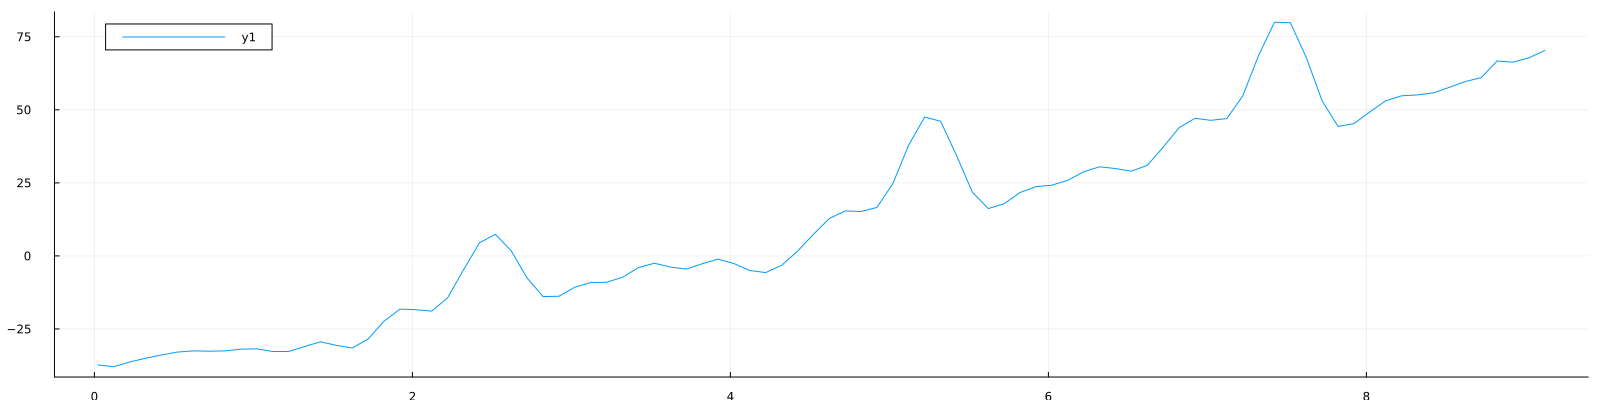

In [155]:
# using SavitzkyGolay
# using Plots
# from matplotlib import pyplot as plt
# import matplotlib as mpl
#sg = savitzky_golay(y::AbstractVector, window_size::Int, order::Int; deriv::Int=0, rate::Real=1.0)

#sg = savitzky_golay(df.NS, 3, 6) 

# print(len(df.Chainage))
# plt.subplots(figsize=(20,5))
# plt.plot(df.Chainage, df.Texture)
#plot(df.Chainage,[df.Texture,sg.y],size=(1600,400))
plot(df.Chainage,df.NS,size=(1600,400))
#plot!(df.Chainage, sg.y,lc=:red)

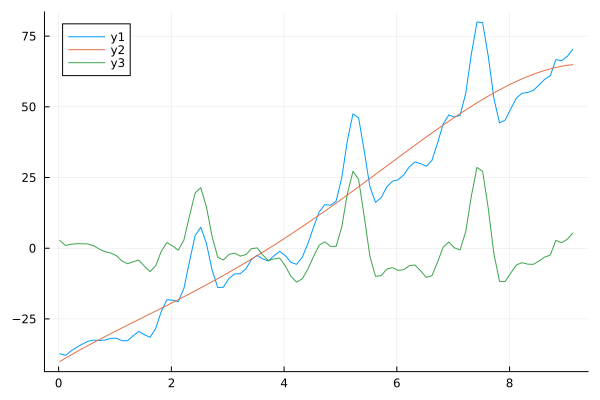

In [156]:

poly = curve_fit(Polynomial, df.Chainage, df.NS, 4)
df.basepoly = poly.(df.Chainage)

# the corrected values should be a flat plot centered on the mean by subtracting the poly from the actuals

df.corrected = df.NS - df.basepoly

plot(df.Chainage, df.NS)
plot!(df.Chainage, df.basepoly)
plot!(df.Chainage, df.corrected)
#plate_average = mean(plate.corrected)

In [157]:
using Peaks

pks = findmaxima(df.corrected)
fred= DataFrame([pks])
select!(fred, Not(:data))

indices=fred.indices[1]
heights=fred.heights[1]

heights

lp_df = DataFrame(indices=indices, heights=heights)

subset!(lp_df, :heights => heights -> heights.> 0)
#lp_df

Row,indices,heights
,Int64,Float64
1,4,1.58695
2,20,2.01386
3,26,21.4032
4,36,0.124492
5,48,2.27104
6,53,27.2288
7,70,2.18649
8,75,28.5844
9,89,2.78101


In [149]:
plate_count =0

for i in 1:nrow(lp_df)
    if plate_count < 3
        lower = lp_df[i,:heights]
        higher = lp_df[i+1,:heights]
        
        if ((higher - lower) > 5) 
            plate_count = plate_count +1
            println("plate ", plate_count, " height is ", higher-lower)             
        end
        #
    end
end

plate 1 height is 19.3893603352662
plate 2 height is 24.95776267217549
plate 3 height is 26.39794628362055


In [158]:
# #length(df.Chainage)

# using Peaks

# pks = findmaxima(df.corrected)

# #println(pks)
# #flush(stdout)

# #pks, proms = 
# pks1 = peakproms(pks; min=0)

# #maxima(df.corrected)
# pks

In [118]:
# using Statistics
# plate3_average = mean(plate3.corrected)
# println(plate3_average)
# flush(stdout)
# #calculate the mean values of the corrected values above the overall mean

# mean_above_average = mean(plate3[plate3[!,:corrected].>plate3_average,:].corrected)
# println(mean_above_average)
# flush(stdout)

# # and below mean
# #plate1[plate1[!,:corrected].>plate1_average,:]
# mean_below_average = mean(plate3[plate3[!,:corrected].<plate3_average,:].corrected)
# print(mean_below_average)
# flush(stdout)

# abs(diff([mean_above_average, mean_below_average])[1]*2)

In [119]:
# plate3_average

In [120]:
# mean_below_average

In [121]:
# @transform!(df_diff_calc, :abs_data_diff = replace(:abs_data_diff, missing => 1))

# df_diff_calc

In [122]:
# threshold = 1.5 # Given threshold
# exceed_points = [] # will be a list of rows near the edges of the plate.

# prev_val = df_diff_calc[1,:abs_data_diff]
# end_of_df = length(df_diff_calc[!,:abs_data_diff])
# println("end ",end_of_df)
# println("first previous ",prev_val)
# @transform(df_diff_calc, :abs_data_diff = replace(:abs_data_diff, missing => 0))
# #loop_range = range(1, 15, end_of_df)
# # outer loop means that only the row numbers vivisable by 15 are processed
# for i in 1:end_of_df
#   # current_val = df.iloc[i]['Texture'] 
#   if i % 12 == 0
#     #println("pos ", i)
  
#   #int_i = 
  
#   current_val = df_diff_calc[i, :abs_data_diff]
#   print(current_val)
#     if abs(current_val - prev_val) > threshold
#       append!(exceed_points, i)
#       #i= i + 700
#       prev_val = current_val
#     #
#     end
#   end
# end
# println("Points at which the difference in values exceeds $threshold are $exceed_points")

In [123]:
# threshold = 22 # Given threshold
# exceed_points = []
# prev_val = df[1,:Texture]
# end_of_df = length(df[!,:Texture])
# println("end ",end_of_df)
# println("first tex ",prev_val)
# #loop_range = range(1, 15, end_of_df)
# # outer loop means that only the row numbers vivisable by 15 are processed
# for i in 1:end_of_df
#   # current_val = df.iloc[i]['Texture'] 
#   if i % 12 == 0
#     #println("pos ", i)
  
#   #int_i = 
  
#   current_val = df[i, :Texture]
#     if abs(current_val - prev_val) > threshold
#       append!(exceed_points, i)
#       #i= i + 700
#       prev_val = current_val
#     #
#     end
#   end
# end
# println("Points at which the difference in values exceeds $threshold are $exceed_points")

In [124]:
# # return the rows where the difference is greater than a given value
# potential_plates = subset(df_diff_calc, :abs_data_diff => ByRow(abs_data_diff -> abs_data_diff > 2), skipmissing=true)
# #
# #textureΔ =
# #mapcols(data_diff -> df_diff_calc)

In [125]:
# #length_of_df = length(potential_plates[!,1])
# length_of_df = length(df_diff_calc[!,1])
# println(length_of_df)
# df_diff_calc.data_diff[ismissing.(df_diff_calc.data_diff)] .= 0

# # global df_diff_calc
# i=1
# # global plate_start =1
# # global plate_end= 2
# # global plate_position = 1

# while i <= length_of_df

#     println(i)
#     #plate_position = i
#     #plate_start=1
#     #plate_end=1
#     abs_data_diff = df_diff_calc[i,:abs_data_diff]
#     #int_data_diff: Float64 = df_diff_calc[i,:data_diff]
#     int_data_diff = df_diff_calc[i,:data_diff]
#     #println(plate_position) # , "DATA DIFF ",int_data_diff)

#     if ismissing(int_data_diff) int_data_diff = 0 end

#     print(int_data_diff)

#     if int_data_diff <= -2.0
#         plate_start = i
#         println("row ", i, " data_diff ",int_data_diff)
#         i = i + 800
#     # else
#     #     i+=1
#         #continue
#     end

    # if int_data_diff >= 2
    #     plate_end = i
    #     i =i +1000
    #     println( "start ", plate_start)
    #     println("End ", plate_end)
    # end
#     global i +=1
    
# end


In [126]:
# while i <= 3
#     println(i)
#     global i += 1
# end
# println(i)

In [127]:
# i=1

# while i <= 3
#     println(i)
#     global i += 1
# end
# println(i)

In [128]:
#length_of_df

In [129]:
#df_diff_calc

In [130]:
# # find the regression line for plate 1
# using GLM
# model = lm(@formula(Texture ~ 1 + Chainage + Chainage^2), plate1)  # Note how the formula looks exactly like the model you want to build
# plot(plate1.Chainage, predict(model, plate1), label="model")
# plot!(plate1.Chainage, plate1.Texture)

# plate1.baseline = predict(model,plate1)

# plate1.corrected = plate1.Texture - plate1.baseline

# plot!(plate1.Chainage, plate1.corrected)
